In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import platform
from scipy.io import loadmat
import pickle
import scipy as sc
import statsmodels.api as sm
from matplotlib import cm
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde
import scipy
import rpy2.robjects as robjects
import feather
from scipy.stats import wilcoxon
from scipy.stats import kruskal

# Data path
path = 'C:/Users/user/Dropbox (PPCA)/notebooks/notebooks_LabPC/Data/'

import sys
sys.path
# sys.path.append('C:/Users/ilieder/Dropbox/phd/Thesis/chapter3/paper/\
# ilieder/AppData/Local/Continuum/miniconda3/envs/python2/Lib/\
# site-packages/rpy2/R/win-library/3.4/psyphy')
    
    
from utils_full import *

utils = importr('utils')
mgcv = importr('mgcv')
base = importr('base')
psyphy= importr('psyphy')
stats = importr('stats')
link = psyphy.probit_2asym(.05,.05)
fam = stats.binomial(link)

from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from rpy2.robjects.conversion import py2ri
from rpy2.robjects import pandas2ri
rpy2.robjects.numpy2ri.activate()
pandas2ri.activate()


def mgcv_fit(df_,model,factors=False,newdata=[]):
    datar= base.data_frame(df_)
    if type(factors) == list:
        for fac in factors:
            datar[columns.index(fac)] = base.as_factor(datar[columns.index(fac)]) # declaring y1 into a factor
    b=mgcv.gam(ro.r(model),\
               data=datar,\
               family=fam,\
               optimizer='perf')

    if isinstance(newdata, pd.DataFrame):
        fs,es = mgcv.predict_gam(b,newdata=newdata,type="terms",se="True")
    else:
        fs,es = mgcv.predict_gam(b,type="terms",se="True", nthreads=8)
    fs = np.asarray(fs)
    es = np.asarray(es)
    return [fs,es]


def mgcv_fit_bam(df_,model,factors=False,newdata=[]):
    datar= base.data_frame(df_)
    if type(factors) == list:
        for fac in factors:
            datar[columns.index(fac)] = base.as_factor(datar[columns.index(fac)]) # declaring y1 into a factor
    b=mgcv.bam(ro.r(model),\
               data=datar,\
               family=fam)
    if isinstance(newdata, pd.DataFrame):
        fs,es = mgcv.predict_bam(b,newdata=newdata,type="terms",se="True")
    else:
        fs,es = mgcv.predict_bam(b,type="terms",se="True", discrete="True",
                                 nthreads=8)
    fs = np.asarray(fs)
    es = np.asarray(es)
    return [fs,es]

def draw_horizonal(ax,x1,x2,y):
    xx = np.linspace(x1,x2,1000)
    yy = np.ones_like(xx)*y
    ax.plot(xx,yy,'--k')
    
    
def draw_vertical(ax,y1,y2,x):
    yy = np.linspace(y1,y2,1000)
    xx = np.ones_like(yy)*x
    ax.plot(xx,yy,'-k',lw=2)
    
def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    noise = []
    ys = []
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i])
        noise.append(np.random.randn(len(ys[i]))*.07)
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i]+noise[i],data[i],'o',ms=4,color='k',alpha=.3)
        try:
            ax.plot(ys, data,  '-', color = 'k',alpha=.05)
            ax.plot(ys, np.mean(data,1), '-k',lw=2)
        except:
            pass
    
    bplot1 = ax.boxplot(data ,1, positions=y, vert=1, patch_artist=True, showmeans=True,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xticklabels(xlabel)
    ax.set_ylabel(ylabel, fontsize=35)    
    ax.set_title(title, fontsize=20)
    simpleaxis(ax,15)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if sys.path[0] == '':
c:\Users\user\miniconda3\envs\py39\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
from matplotlib.pyplot import * 

f,ax = plt.subplots(1,figsize=[10,7],sharex='col',sharey=True)
sigmoid1 = lambda x: 1 / (1 + np.exp(-x-3))
sigmoid2 = lambda x: 1 / (1 + np.exp(-x+3))
sigmoid3 = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,100)
# ax.plot(x,sigmoid1(x),'blue',lw=5, label='$f_{0_{S_{1}}}<\langle f \\rangle$')
# ax.plot(x,sigmoid2(x),'red',lw=5, label='$f_{0_{S_{1}}}>\langle f \\rangle$')
# ax.plot(x,sigmoid3(x),'purple',lw=5, label='$f_{0_{S_{1}}}=\langle f \\rangle$')

ax.plot(x,sigmoid3(x),'purple',lw=5, label='$b_0 = 0$')
ax.plot(x,sigmoid1(x),'blue',lw=5, label='$b_0 > 0$')
ax.plot(x,sigmoid2(x),'red',lw=5, label='$b_0 < 0$')

y = np.linspace(0,1,1000)
ax.plot(np.ones_like(y)*0,y,'--k')
simpleaxis(ax,25)

# ax.annotate(text='', xy=(-3,.5), xytext=(0,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# plt.text(-2.6, 0.52, '$b_0 > 0$', fontsize = 18)

# # ax.annotate(text='', xy=(-0.03,.5), xytext=(-0.03,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# ax.annotate(text='', xy=(0,.5), xytext=(3,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# plt.text(0.5, 0.52, '$b_0 < 0$', fontsize = 18)

# Chaning font to stix
rcParams['mathtext.fontset'] = 'stix'

plt.xlabel("$\delta=f_{2} - f_{1}$", fontsize=30)
plt.ylabel("$P($'$f_{2} > {f_{1}}}$')$ = \Phi(\delta + b_0)$", fontsize=30)
plt.title('Psychometric curves', fontsize=30)
ax.legend(prop={'size': 22})

plt.tight_layout(pad=1)

# saveas = 'images/figure1_'+'c'+'.png'
# plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

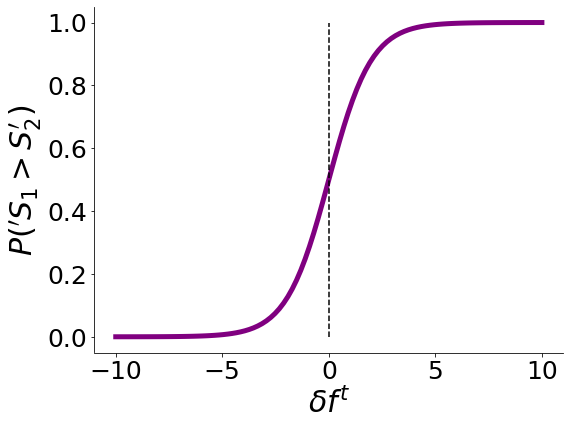

In [2]:
from matplotlib.pyplot import * 

f,ax = plt.subplots(1,figsize=[8,6],sharex='col',sharey=True)
sigmoid1 = lambda x: 1 / (1 + np.exp(-x-3))
sigmoid2 = lambda x: 1 / (1 + np.exp(-x+3))
sigmoid3 = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,100)
# ax.plot(x,sigmoid1(x),'blue',lw=5, label='$f_{0_{S_{1}}}<\langle f \\rangle$')
# ax.plot(x,sigmoid2(x),'red',lw=5, label='$f_{0_{S_{1}}}>\langle f \\rangle$')
# ax.plot(x,sigmoid3(x),'purple',lw=5, label='$f_{0_{S_{1}}}=\langle f \\rangle$')

ax.plot(x,sigmoid3(x),'purple',lw=5, label='$b = 0$')
# ax.plot(x,sigmoid1(x),'blue',lw=5, label='$b > 0$')
# ax.plot(x,sigmoid2(x),'red',lw=5, label='$b < 0$')

y = np.linspace(0,1,1000)
ax.plot(np.ones_like(y)*0,y,'--k')
simpleaxis(ax,25)

# ax.annotate(text='', xy=(-3,.5), xytext=(0,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# plt.text(-2.6, 0.52, '$b_0 > 0$', fontsize = 18)

# # ax.annotate(text='', xy=(-0.03,.5), xytext=(-0.03,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# ax.annotate(text='', xy=(0,.5), xytext=(3,.5), arrowprops=dict(arrowstyle='<->', lw=3))
# plt.text(0.5, 0.52, '$b_0 < 0$', fontsize = 18)

# Chaning font to stix
rcParams['mathtext.fontset'] = 'stix'

plt.xlabel("$\delta f^t$", fontsize=30)
plt.ylabel("$P('S_{1} > S_{2}')$", fontsize=30)
# plt.title('Psychometric curves', fontsize=30)
# ax.legend(prop={'size': 22})

plt.tight_layout(pad=1)

# saveas = 'images/figure1_'+'c'+'.png'
# plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

In [2]:
def build_features(data_dict,alphas=[]):
    
    f1 = data_dict['f1'] 
    f1x2 = np.log2(2**f1*2)
    f1x3 = np.log2(2**f1*3)
    f1x4 = np.log2(2**f1*4)

    f2 = data_dict['f2'] 
    Y = data_dict['resp'] 
    acc = data_dict['acc'] 

    try:
        cgroup = data_dict['cgroup'] 
    except: 
        cgroup = np.ones_like(f1)
        
    try:
        flag = data_dict['flag'] 
    except:
        flag = np.ones_like(f1)    
        
    Ytrue = ((f1-f2)<0).astype(int) # what the subject should answer

    lag = 5
    Y1 = Y[:,lag-1:-1]
    # d1 = f1[:,lag:]-0.5*(f1[:,lag-1:-1]+f1[:,lag-1:-1])
    d1 = f1[:,lag:]-f1[:,lag-1:-1]
    # d1x2 = f1[:,lag:]-f1x2[:,lag-1:-1]
    d1x2 = f1x2[:,lag:]-f1[:,lag-1:-1]
    d1x3 = f1[:,lag:]-f1x3[:,lag-1:-1]
    d1x4 = f1[:,lag:]-f1x4[:,lag-1:-1]

    d12 = f1[:,lag:]-f2[:,lag-1:-1]
    d2 = f1[:,lag:]-0.5*(f1[:,lag-2:-2]+f2[:,lag-2:-2])
    d22 = f1[:,lag:]-f2[:,lag-2:-2]

    d3 = f1[:,lag:]-0.5*(f1[:,lag-3:-3]+f2[:,lag-3:-3])
    d4 = f1[:,lag:]-0.5*(f1[:,lag-4:-4]+f2[:,lag-4:-4])
    d5 = f1[:,lag:]-0.5*(f1[:,lag-5:-5]+f2[:,lag-5:-5])
    df = (f2-f1)[:,lag:]
    dinf = f1[:,lag:]-(f1.min()+0.5*(f1.max()-f1.min()))
    #dinf = f1[:,lag:]-f1.mean()

    if flag.shape != f1.shape:
        flag = np.ones_like(f1)

    flag = flag[:,lag:]
    acc_raw = acc[:,lag:]

    corr = (Y==Ytrue).astype(int) # whether subject responded correct or wrong
    corr1 = 2*(corr[:,lag-1:-1])-1 # correct or wrong
    corr =  2*(corr[:,lag:]).astype(int)-1 # correct
    Y  = Y[:,lag:]
    Ytrue1  = Ytrue[:,lag-1:-1]
    switch1 = corr1 * Y1 # correct * previous
    
    cgroup  = cgroup[:,lag:]

    dinf_g1 = np.copy(dinf)
    dinf_g2 = np.copy(dinf)
    dinf_g1[cgroup>0] = 0
    dinf_g2[cgroup<=0] = 0
    
    d1_g1 = np.copy(d1)
    d1_g2 = np.copy(d1)
    d1_g1[cgroup>0] = 0
    d1_g2[cgroup<=0] = 0
    
    side = np.copy(dinf)
    side[side<=0] = -1
    side[side>0] = 1

    macc = np.copy(acc[:,lag:])
    for i_s in range(acc.shape[0]):
        macc[i_s,:] = acc[i_s,:].mean()
        
    thresh = .75
    group = (macc < thresh).astype(int)*2-1
    subject = np.tile(np.arange(Y.shape[0]),[Y.shape[1],1]).T
    
    if alphas == []:
        alphas = np.zeros_like(f1[:,1:])
        
    alphas = alphas[:,lag-1:]

    trials = np.tile(np.linspace(0,d1.shape[1]-1,d1.shape[1]),(f1.shape[0],1))
    trials = trials*(macc.max()-macc.min())/trials.max() + macc.min()
    
    d1,d1x2,d1x3,d1x4,d12,d1_g1,d1_g2,d2,d22,d3,d4,d5,df,dinf,dinf_g1,dinf_g2,macc,acc_raw,alphas,flag,\
    Ytrue1,corr,corr1,switch1,group,side,cgroup,subject,Y,Y1 =\
    [u.reshape(1,-1) for u in [d1,d1x2,d1x3,d1x4,d12,d1_g1,d1_g2,d2,d22,d3,d4,d5,df,dinf,dinf_g1,dinf_g2,macc,acc_raw,\
                               alphas,flag,Ytrue1,corr,corr1,switch1,group,side,cgroup,subject,Y,Y1]]
    
    X = np.vstack( [df,d1,d1x2,d1x3,d1x4,d12,d1_g1,d1_g2,d2,d22,d3,d4,d5,dinf,dinf_g1,dinf_g2,macc,acc_raw,alphas,flag,\
                    Ytrue1,corr,corr1,switch1,group,side,cgroup,subject,Y1])
    D = np.vstack([X,Y]).T

    columns=['df','d1','d1x2','d1x3','d1x4','d12','d1_g1','d1_g2','d2','d22','d3','d4','d5','dinf','dinf_g1','dinf_g2','acc',\
             'acc_raw','alphas','flag','ytrue1','corr','corr1','switch1','group','side','cgroup','subject','y1','y']
    df_ = pd.DataFrame(D,columns=columns)
    return df_, columns, data_dict

In [3]:
# path = '../../../Data/'
path = 'C:/Users/user/Dropbox (PPCA)/notebooks/notebooks_LabPC/Data/'

with open(path + "datasets.p", 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    datasets_dict = u.load()
    
fnames = ['complex_pure_mixed_no_missing',\
          'complex_pure_mixed_missing_f',\
          'complex_pure_mixed_missing_f1']

dist_names = fnames
# dist_dict = {0:dist_names[0], 1:dist_names[1], 2:dist_names[2], 3:dist_names[3]}
# colors_dict = {0:'b',1:'r',2:'g',3:'c'}

key = 'Complex'

thresh = 0.0089138
# thresh = 2

dfs = []
datas = []

for i,fname in enumerate(fnames):
    print(fname)
    data = datasets_dict[key][fname].copy()
    data['resp'] = data['resp']
    acc_lims=(.55,1.)
    data_dict,_ = filter_sub_trials(data,\
                      acc_lims=acc_lims,\
                      consistency_prm={'n_window': 10, 'w_window': 60, 'thresh': thresh},\
                      trial_lims = (0,600))
    
    alphas = fit_alphas(data_dict,infer='')

    df, columns, data = build_features(data_dict,alphas)
    dfs.append(df)
    datas.append(data)

complex_pure_mixed_no_missing
in log e
(1, 310)
(1, 310)
(1, 310)
before filtering:  310
After acc filtering:  239
After consistency filtering:  230
(1, 230)
(1, 230)
(1, 230)
total left:  230/310
total excluded:  80/310
included: 74.1 % ; excluded: 25.8 %


c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:81: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


complex_pure_mixed_missing_f
in log e
(1, 400)
(1, 400)
(1, 400)
before filtering:  400
After acc filtering:  332
After consistency filtering:  316
(1, 316)
(1, 316)
(1, 316)
total left:  316/400
total excluded:  84/400
included: 79.0 % ; excluded: 21.0 %
complex_pure_mixed_missing_f1
in log e
(1, 338)
(1, 338)
(1, 338)
before filtering:  338
After acc filtering:  272
After consistency filtering:  253
(1, 253)
(1, 253)
(1, 253)
total left:  253/338
total excluded:  85/338
included: 74.8 % ; excluded: 25.1 %


In [4]:
dfs_org = dfs
dfs2 = []
for df in dfs_org:

    df['flag'] = (df['flag']==1) + 0.

    flag_1 = np.hstack([1,df['flag'][1:]])
    flag_2 = np.hstack([1,df['flag'][:-1]])
    dinf_1 = np.hstack([1,df['dinf'][1:]])
    dinf_2 = np.hstack([1,df['dinf'][:-1]])
    dinf = df['dinf']
    df['flags_d1'] = df['flag']
    df['flags_d1'][(flag_1==1) & (flag_2==1)] = 0
    df['flags_d1'][(flag_1==0) & (flag_2==0)] = 1
    df['flags_d1'][(flag_1==1) & (flag_2==0) & (dinf<0)] = 2
    df['flags_d1'][(flag_1==1) & (flag_2==0) & (dinf>0)] = 3

    df['flags_d1'][(flag_1==0) & (flag_2==1) & (dinf_2<0)] = 4
    df['flags_d1'][(flag_1==0) & (flag_2==1) & (dinf_2>0)] = 5

    df['flags_d1'][(flag_1==1) & (flag_2==1) & (dinf_2<0)] = 6
    df['flags_d1'][(flag_1==1) & (flag_2==1) & (dinf_2>0)] = 7

#     df['flags_d1'][(flag_1==1) & (flag_2==0)] = 2

    # df['flags_d1'][(flag_1==0) & (flag_2==1)] = 3

    df['intercept'] = df['dinf']>-1000

    if 'flags_d1' not in columns:
        columns.append('flags_d1')

    if 'intercept' not in columns:
        columns.append('intercept')

    print(len(df))
    df = df[~((df['flags_d1']==1) & (df['d1']<-1))]
    df = df[~((df['flags_d1']==2) & (df['d1']<-1))]
    df = df[~((df['flags_d1']==3) & (df['d1']<0))]
    df = df[~((df['flags_d1']==4) & (df['d1']<-1.))]
    df = df[~((df['flags_d1']==5) & (df['d1']>0.))]
    df = df[~((df['flags_d1']==6) & (df['d1']<-1))]
    df = df[~((df['flags_d1']==6) & (df['dinf']>0) & (df['d1x2']<-1))]

    df = df[~((df['flags_d1']==7) & (df['d1']>1))]
    df = df[~((df['flags_d1']==7) & (df['dinf']<0) & (df['d1']>0))]
    
    df = df.set_index(np.arange(len(df)))
    dfs2.append(df)
    
dfs = dfs2

67850
93220
74635


In [5]:
max_subs = []
for df in dfs:
    max_subs.append(df['subject'].max())
    
df1 = dfs[0].copy()
df2 = dfs[1].copy()
df3 = dfs[2].copy()

df2['subject'] = df2['subject'] + int(max_subs[0])
df3['subject'] = df3['subject'] + int(max_subs[0]) + int(max_subs[1])

In [6]:
for df in [df1,df2,df3]:
    print(df['subject'].max())

229.0
544.0
796.0


In [7]:
df_comb = df1.append(df2.append(df3))
df_comb.set_index(np.arange(len(df_comb)))
# df_comb.head()

pd.set_option('display.max_columns', None)
# print(df_comb)

In [8]:
'''
Export to R
pure after complex - both sides
2 additionarl features - d1_r and d1x2_r
3 dataframe, one for each experiment
'''

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==1)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))   
    
# path_ = 'C:/R_working_dir/my_data_image1_a.feather'
path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir/my_data_image1_a.feather'
feather.write_dataframe(df_1, path_)

In [10]:
df_1

,df,d1,d1x2,d1x3,d1x4,d12,d1_g1,d1_g2,d2,d22,d3,d4,d5,dinf,dinf_g1,dinf_g2,acc,acc_raw,alphas,flag,ytrue1,corr,corr1,switch1,group,side,cgroup,subject,y1,y,flags_d1,intercept
0,0.057117,-0.387023,0.612977,-1.971986,-2.387023,-0.343954,0.0,-0.387023,-0.699873,-0.635844,-0.819135,-0.079966,-0.820475,-0.944858,0.0,-0.944858,0.963333,1.0,82.290791,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,1.0,True
1,0.074001,0.269954,1.269954,-1.315009,-1.730046,0.212837,0.0,0.269954,-0.095535,-0.074001,-0.429919,-0.549181,0.189988,-0.674904,0.0,-0.674904,0.963333,1.0,95.826449,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,1.0,True
2,-0.059706,0.227094,1.227094,-1.357869,-1.772906,0.297229,0.0,0.227094,-1.384202,-1.347691,0.050056,0.328452,-0.008478,-0.587847,0.0,-0.587847,0.963333,1.0,130.301367,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,True
3,-0.127933,-0.148157,0.851843,-1.733120,-2.148157,-0.088451,0.0,-0.148157,0.114004,0.149072,-1.532359,-0.098101,0.180295,-0.736004,0.0,-0.736004,0.963333,1.0,42.480009,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,True
4,-0.032753,0.182733,1.182733,-1.402230,-1.817267,0.057815,0.0,0.182733,0.179230,0.201229,-0.466856,0.261004,0.237039,-0.167944,0.0,-0.167944,0.963333,1.0,206.355471,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,0.0,1.0,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58774,0.092184,-0.444353,0.555647,-2.029316,-2.444353,-0.324464,0.0,-0.444353,-0.815777,-0.822386,-0.094052,-0.802355,-0.787071,-0.553598,0.0,-0.553598,0.896667,1.0,18.543525,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,796.0,1.0,1.0,1.0,True
58775,-0.082071,-0.067114,0.932886,-1.652077,-2.067114,-0.159298,0.0,-0.067114,-0.451523,-0.391579,-0.882891,-0.161167,-0.869470,-0.620712,0.0,-0.620712,0.896667,1.0,18.783069,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,796.0,1.0,0.0,1.0,True
58776,0.054635,-0.191696,0.808304,-1.776658,-2.191696,-0.109624,0.0,-0.191696,-0.304902,-0.350993,-0.643219,-1.074586,-0.352862,-0.812407,0.0,-0.812407,0.896667,1.0,18.465988,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,1.0,796.0,0.0,1.0,1.0,True
58777,-0.044449,-0.253079,0.746921,-1.838041,-2.253079,-0.165249,0.0,-0.253079,0.083743,0.133831,-0.928002,-0.052995,0.049095,-0.280725,0.0,-0.280725,0.896667,1.0,18.890329,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,1.0,796.0,0.0,0.0,1.0,True


In [9]:
model = 'y~ s(alphas,by=df,k=5) + s(d1_r, k=4) + s(d1_r2, k=4) + s(dinf,k=7)'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==6)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0
print(len(df_1))

# path_ = 'C:/R_working_dir/my_data_image1_b.feather'
path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir/my_data_image1_b.feather'
feather.write_dataframe(df_1, path_)

29523


c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
model = 'y~ s(alphas,by=df,k=5) + s(d1_r, k=4) + s(d1x2_r, k=4) + s(dinf,k=7)'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))\

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1x2_r'] = df_1['d1x2']
df_1['d1x2_r'][df_1['dinf']<0] = 0

# path_ = 'C:/R_working_dir/my_data_image1_c.feather'
path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir/my_data_image1_c.feather'
feather.write_dataframe(df_1, path_)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
model = 'y~ s(alphas,by=df,k=5) + s(d1,k=4) + s(dinf,k=7)'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==4)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

# path_ = 'C:/R_working_dir/my_data_image1_d.feather'
path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir//my_data_image1_d.feather'
feather.write_dataframe(df_1, path_)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
'''
Export results from R
'''

fss = []
fes = []

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_a.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_b.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_c.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_d.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

In [ ]:
# ===== Human participants =====
d1_var = []
d1_area = []
d1_vals = []

colors = ['b' ,'dodgerblue', 'r', 'g']

f ,axarr = plt.subplots(1,figsize=(8,6),sharey='row',sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['gold','dodgerblue']

ax = axarr
df = df_comb.copy()

for i,v in enumerate([1,6,2,4]):
    
    d1_var.append([])
    d1_area.append([])
    d1_vals.append([])
    
    df_1 = df[(df['flags_d1'].values==v)].copy()
    
    if v in [1,4]:
        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i],-fes[i]
        o = np.argsort(df_1['d1'].values)
        plot_with_errors(ax,df_1['d1'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
        d1_vals[-1] = df_1['d1'].values
        
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
            vals = fs[o,1] + fs[o,4]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
        
    elif v == 6:
        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1_r2'] = df_1['d1']
        df_1['d1_r2'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i],-fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
        d1_vals[-1] = df_1['d1_r'].values

        fs = fs[df_1['dinf']<0,:]
        df_1 = df_1[df_1['dinf']<0]
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
            I = fs[o,1]!=0
            vals = fs[o,1][I] + fs[o,5][I]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
        
    else:
        df_1 = df[(df['flags_d1'].values==v) | (df['flags_d1'].values==v+1)].copy()

        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1x2_r'] = df_1['d1x2']
        df_1['d1x2_r'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i],-fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)

        d1_vals[-1] = df_1['d1_r'].values

        fs = fs[df_1['dinf']<0,:]
        df_1 = df_1[df_1['dinf']<0]
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
#             I = fs[o,1]!=0
#             print(fs[o,1])
            vals = fs[o,1] + fs[o,5]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
        



# =================================================================================

ax.set_xlim([-1,1])
    
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

draw_horizonal(ax,-2,2,0)
simpleaxis(ax)



plt.tight_layout()
plt.show()



'''
blue - complex after complex
green - pure after pure
red - pure after complex
yellow - complex after pure
'''

In [ ]:
f, axarr = plt.subplots(1,2,figsize = [15,8], sharey="col")
for i,data in enumerate([d1_var, d1_area]):
    ax = axarr[i]
    if i==0:
        ylabel = 'Var'
    if i==1:
        ylabel = 'Area'
        
    box_plot(ax, data, 
             xlabel = ['comp-comp','pure-pure','comp-pure','pure-comp'] , 
             ylabel = ylabel, 
             colors = colors,
             title = ylabel,
            )
plt.tight_layout()
plt.show()

In [ ]:
dunn = importr('dunn.test')


for param, param_name in zip([d1_var, d1_area], ['Variance', 'Area', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

## Image 1-a

In [12]:
mgcv = importr('mgcv')
base = importr('base')
psyphy= importr('psyphy')
stats = importr('stats')
link = psyphy.probit_2asym(.05,.05)
fam = stats.binomial(link)

In [13]:
fss = []
fes = []

'''
All complex after all complex
No need for extra features
'''

model = 'y~ s(acc,by=df,k=5) + s(d1,k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==1)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))   
print(len(df_1))
try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

fss.append(fs)
fes.append(es)

# ==============================================================================
'''
Pure after pure
defined only after left side (dinf_2<0)
d1_r - only current left side
d1_r2 - only current right side
Analyzing only d1_r
'''

model = 'y~ s(acc,by=df,k=5) + s(d1_r, k=4) + s(d1_r2, k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1_r,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==6)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0
print(len(df_1))

try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
fss.append(fs)
fes.append(es)
# ==============================================================================

'''
pure after complex
Choosing both current sides of pure (2 - left, 3 - right)
d1_r - only current left side
d1x2_r - only current right side - DISTANCE FROM SECOND HARMONIC

Analyzing only d1_r
'''

model = 'y~ s(acc,by=df,k=5) + s(d1_r, k=4) + s(d1x2_r, k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1_r,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))\

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1x2_r'] = df_1['d1x2']
df_1['d1x2_r'][df_1['dinf']<0] = 0


print(len(df_1))
try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
fss.append(fs)
fes.append(es)
# ==============================================================================
'''
complex after pure
No need for extra features
'''

model = 'y~ s(acc,by=df,k=5) + s(d1,k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==4)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))

try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

fss.append(fs)
fes.append(es)  

58779


c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


29523


In [ ]:
colors = ['b' ,'dodgerblue', 'r', 'g']

f ,axarr = plt.subplots(1,figsize=(8,6),sharey='row',sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['gold','dodgerblue']

ax = axarr
df = df_comb.copy()

for i,v in enumerate([1,6,2,4]):

    df_1 = df[(df['flags_d1'].values==v)].copy()
    
    if v in [1,4]:
        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = fss[i],fes[i]
        o = np.argsort(df_1['d1'].values)
        
        plot_with_errors(ax,df_1['d1'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
    elif v == 6:
        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1_r2'] = df_1['d1']
        df_1['d1_r2'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = fss[i],fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
    else:
        df_1 = df[(df['flags_d1'].values==v) | (df['flags_d1'].values==v+1)].copy()

        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1x2_r'] = df_1['d1x2']
        df_1['d1x2_r'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = fss[i],fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)


# =================================================================================

ax.set_xlim([-1,1])
    
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

draw_horizonal(ax,-2,2,0)
simpleaxis(ax)



plt.tight_layout()
plt.show()



'''
blue - complex after complex
green - pure after pure
red - pure after complex
yellow - complex after pure
'''

## Image 1-b,c

In [ ]:
A_comp_pure = []
E_comp_pure = []
A_comp_pure2 = []
E_comp_pure2 = []


model = 'y~ s(alphas,by=df,k=5) + s(d1_r,k=4) + s(d1_r2,k=4) + s(dinf,k=7)'
'''
pure after pure
6 - defined only after left side (dinf_2<0)
d1_r - only current left side
d1_r2 - only current right side
'''
df = df_comb.copy()

df_1 = df[df['flags_d1'].values==6].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))
fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

A_comp_pure.append(fs)
E_comp_pure.append(es)
    
# ====================================================================
'''
pure after pure
7 - defined only after right side (dinf_2>0)
d1_r - only current left side
d1_r2 - only current right side
'''

df = df_comb.copy()

df_1 = df[df['flags_d1'].values==7].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))
fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

A_comp_pure2.append(fs)
E_comp_pure2.append(es)

In [ ]:
f ,axarr = plt.subplots(1,4,figsize=(10,4),sharey='row')
colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
colors = ['green','green','magenta','magenta']
colors = ['dodgerblue','dodgerblue', 'gold','gold']


ax = axarr[0]
df = df_comb.copy()

df_1 = df[(df['flags_d1'].values==6)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))
print('length of pure-lower --> either: {}'.format(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

fs,es = A_comp_pure[0],E_comp_pure[0]
o = np.argsort(df_1['d1_r'].values)
'''
RED - LEFT side after left side
'''
plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[0],alpha=alpha)

ax = axarr[1]

o = np.argsort(df_1['d1_r2'].values)
'''
DODGERBLUE - RIGHT side after left side
'''
plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,2],es[o,2],colors[1],alpha=alpha)

# =================================================================================
ax = axarr[1]
df = df_comb.copy()

df_1 = df[(df['flags_d1'].values==7)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))


print('length of pure-higher --> either: {}'.format(len(df_1)))


df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

fs,es = A_comp_pure2[0],E_comp_pure2[0]
o = np.argsort(df_1['d1_r'].values)
'''
BLUE - LEFT side after right side
'''
plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[2],alpha=.3)

ax = axarr[0]
o = np.argsort(df_1['d1_r2'].values)
'''
MEGENTA - RIGHT side after right side
'''
plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,2],es[o,2],colors[3],alpha=.3)

# =================================================================================
df_1 = df[(df['flags_d1'].values==6)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))
fs,es = A_comp_pure[0],E_comp_pure[0]

ax = axarr[2]
o = np.argsort(df_1['dinf'].values)
plot_with_errors(ax,df_1['dinf'].values[o],fs[o,3],es[o,3],colors[3],alpha=.3)

# =================================================================================
df_1 = df[(df['flags_d1'].values==7)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))
fs,es = A_comp_pure2[0],E_comp_pure2[0]

ax = axarr[3]
o = np.argsort(df_1['dinf'].values)
plot_with_errors(ax,df_1['dinf'].values[o],fs[o,3],es[o,3],colors[3],alpha=.3)

# =================================================================================

titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

for ax in axarr.flatten():
#     ax.set_xlim([-1.,1.])
    draw_horizonal(ax,-2,2,0)
    simpleaxis(ax)

axarr[0].set_xlim([-1.,1.])


plt.tight_layout()
plt.show()

In [ ]:
n_groups = 2

colors = ['red','dodgerblue','blue','magenta']

'''
varz - 1) left->left, 2) left ->right
varz2 - 1) right->left, 2) right ->right

'''
varz = []
for i in range(2):
    varz.append(A_comp_pure[0][:,1+i].var())
varz2 = []
for i in  range(2):
    varz2.append(A_comp_pure2[0][:,1+i].var())
    
means_frank = varz
means_guido = varz2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color=[colors[0],colors[1]])

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color=[colors[2],colors[3]])

# plt.xlabel('Person')
# plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

## next - anova statistical test, comes out good

In [ ]:
'''
STATISTICAL TEST
For pure after pure
defined only after LEFT side (dinf_2<0)
ANOVA - comparing the significance of each of the two feature: d1_r, d1_r2
'''

models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=4) + s(d1_r2,k=4) + s(dinf,k=7)',
          'y~ s(alphas,by=df,k=5) + s(d1_r2,k=4) + s(dinf,k=7)',
          'y~ s(alphas,by=df,k=5) + s(d1_r,k=4) + s(dinf,k=7)']

df = df_comb.copy()

df_1 = df[df['flags_d1'].values==6].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))
          
datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print( '-------------- addition of d1 --------------------')
b = mgcv.gam(ro.r(models[0]),\
       data=datar,\
       family=fam,\
      optimizer='perf')

b2 = mgcv.gam(ro.r(models[1]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

print(mgcv.anova_gam(b,b2,test='Chisq'))

print( '-------------- addition of d1x2 --------------------')

b = mgcv.gam(ro.r(models[0]),\
       data=datar,\
       family=fam,\
      optimizer='perf')

b2 = mgcv.gam(ro.r(models[2]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

print(mgcv.anova_gam(b,b2,test='Chisq', nthreads=15))

In [ ]:
'''
STATISTICAL TEST
For pure after pure
defined only after RIGHT side (dinf_2>0)
ANOVA - comparing the significance of each of the two feature: d1_r, d1_r2
'''


models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=4) + s(d1_r2,k=4) + s(dinf,k=7)',
        'y~ s(alphas,by=df,k=5) + s(d1_r2,k=4) + s(dinf,k=7)',
         'y~ s(alphas,by=df,k=5) + s(d1_r,k=4) + s(dinf,k=7)']

df = df_comb.copy()

df_1 = df[df['flags_d1'].values==7].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))
          
datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print( '-------------- addition of d1x2 --------------------')
b = mgcv.gam(ro.r(models[0]),\
       data=datar,\
       family=fam,\
      optimizer='perf')

b2 = mgcv.gam(ro.r(models[1]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

print(mgcv.anova_gam(b,b2,test="Chisq"))

print( '-------------- addition of d1 --------------------')

b = mgcv.gam(ro.r(models[0]),\
       data=datar,\
       family=fam,\
      optimizer='perf')

b2 = mgcv.gam(ro.r(models[2]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

print(mgcv.anova_gam(b,b2,test="Chisq", nthreads=15))

## Image 2 - pure after complex, experiment 1: all harmonics

In [ ]:
'''
Export to R
pure after complex - both sides
2 additionarl features - d1_r and d1x2_r
3 dataframe, one for each experiment
'''

for j in range(3):
    
    print(j)
    df = dfs[j]
    
    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['dinf']<0] = 0
    
#     path_ = 'C:/R_working_dir/my_data_{}.feather'.format(j)
    path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir/my_data_{}.feather'.format(j)
    feather.write_dataframe(df_1, path_)
    

In [ ]:
'''
R model:
model = y~ s(acc,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7) + 
s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")

'''

In [ ]:
'''
Export results from R
'''

A_comp_pure2 = []
E_comp_pure2 = []
readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_0.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_1.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_2.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure2.append(fs)
E_comp_pure2.append(es)

In [ ]:
'''
RIGHT SIDE
'''

f ,axarr = plt.subplots(1,3,figsize=(15,5))
alpha=.5
# colors1 = ['green','blue','red']
# colors2 = ['lightgreen','dodgerblue','pink']
colors2 = ['dodgerblue','dodgerblue','dodgerblue']

'''
Green -  experiment 1: all harmonics
blue - experiment 2: missing F0
red - experiment 3: missing F1
'''

for n,i in enumerate(range(3)):
    df = dfs[i]
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    fs,es = -A_comp_pure2[n],-E_comp_pure2[n]

    ax = axarr[i]

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['dinf']<0] = 0
   

    o = np.argsort(df_1['d1x2_r'].values)
    '''
    right side
    '''
    plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors2[n],alpha=.5)
   
   
#     ax.set_xlim([-1,2])
    draw_horizonal(ax,-2,2,0)
   

titles = ['500-1000Hz (F0)', '1000-2000Hz (F1)']    

for ax in axarr.flatten():
    ax.set_xlim([-1.2,1.2])

for ax in axarr.flatten():
    ax.set_ylim([-.6, .6])
    
    
    
# axarr[0].set_ylabel('$b(d_1)$',fontsize=35)

# for ax in axarr.flatten():
#     ax.set_xlabel('$d_1 \\ (octaves)$', fontsize = 25)

# for i, ax in enumerate(axarr.flatten()):
#     ax.set_title(titles[i], fontsize = 25)
   
# import matplotlib.patches as mpatches
# patches = []
# patches.append(mpatches.Patch(colors[0], label='Exp.1: All harmonics'))
# patches.append(mpatches.Patch(colors[1], label='Exp.2: Missing F0'))
# patches.append(mpatches.Patch(colors[2], label='Exp.3: Missing F1'))

# leg = ax.legend(handles=patches,bbox_to_anchor=(1,.8),frameon=False,ncol=1,fontsize=15)
# leg.legendHandles[0].set_color(colors[0])
# leg.legendHandles[1].set_color(colors[1])
# leg.legendHandles[2].set_color(colors[2])

for ax in axarr.flatten():
    simpleaxis(ax)

plt.tight_layout()
plt.show()

In [ ]:
'''
LEFT SIDE
'''


f ,axarr = plt.subplots(1,3,figsize=(15,5))
alpha=.5
colors1 = ['green','blue','red']
colors2 = ['lightgreen','dodgerblue','pink']
colors1 = ['gold','gold','gold']

'''
Green -  experiment 1: all harmonics
blue - experiment 2: missing F0
red - experiment 3: missing F1
'''

for n,i in enumerate(range(3)):
    df = dfs[i]
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    fs,es = -A_comp_pure2[n],-E_comp_pure2[n]

    o = np.argsort(df_1['d1_r'].values)
    '''
    left side 
    '''
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors1[n],alpha=.5)
   
    draw_horizonal(ax,-2,2,0)

#     ax.set_xlim([-1,2])
    draw_horizonal(ax,-2,2,0)
   

titles = ['500-1000Hz (F0)', '1000-2000Hz (F1)']    

for ax in axarr.flatten():
    ax.set_xlim([-1.2,1.2])

for ax in axarr.flatten():
    ax.set_ylim([-.6, .6])
    
    
    
# axarr[0].set_ylabel('$b(d_1)$',fontsize=35)

# for ax in axarr.flatten():
#     ax.set_xlabel('$d_1 \\ (octaves)$', fontsize = 25)

# for i, ax in enumerate(axarr.flatten()):
#     ax.set_title(titles[i], fontsize = 25)
   
# import matplotlib.patches as mpatches
# patches = []
# patches.append(mpatches.Patch(colors[0], label='Exp.1: All harmonics'))
# patches.append(mpatches.Patch(colors[1], label='Exp.2: Missing F0'))
# patches.append(mpatches.Patch(colors[2], label='Exp.3: Missing F1'))

# leg = ax.legend(handles=patches,bbox_to_anchor=(1,.8),frameon=False,ncol=1,fontsize=15)
# leg.legendHandles[0].set_color(colors[0])
# leg.legendHandles[1].set_color(colors[1])
# leg.legendHandles[2].set_color(colors[2])

for ax in axarr.flatten():
    simpleaxis(ax)

plt.tight_layout()
plt.show()

In [ ]:
# ===== Human participants =====
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1x2_var.append([])

    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
   
    fs = -A_comp_pure2[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,5][I]
        d1_var[-1].append(vals.var())
        d1_area[-1].append(np.abs(vals).mean())
        d1_slope[-1].append(-(vals/(df_1['d1'].values[o][I]))[0])

        vals = fs[o,1][~I]+fs[o,6][~I]
        d1x2_var[-1].append(vals.var())
        d1x2_area[-1].append(np.abs(vals).mean())
        d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

In [ ]:
f, axarr = plt.subplots(3,3,figsize = [15,12], sharey="col")

for exp in range(3):
    alpha_face = .5
    alpha_face *= 300
    
    colors = [np.array([0,128,0,alpha_face])/300.,
              np.array([30,144,255,alpha_face])/300., 
              np.array([255,0,0,alpha_face])/300.]

    colors = np.array([np.array([255,215,0,alpha_face])/300.,
                      np.array([30,144,255,alpha_face])/300.])
    
#     color= np.tile(colors[exp],(2,1))
    
    data = [[d1_var[exp] , d1x2_var[exp]],
            [d1_area[exp] , d1x2_area[exp]],
            [d1_slope[exp] , d1x2_slope[exp]]]

    
    exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
    exp_titles = ['Variance', ' Area', 'Slope']

    for i in range(3):
        ax = axarr[exp,i]
        box_plot(ax, data[i], xlabel = ['500-1000Hz \n(F0)', '1000-2000Hz \n(F1)'] , 
                 ylabel = '', 
                 colors = colors,
                 title = exp_titles[i])

    plt.tight_layout(pad=1)
    #saveas = '../images/figure4/figure4_'+str(5)+'.png'
    #plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

## statistical tests 

In [ ]:
methods = ['variance','area','slope']
for i in range(3):
    print('==============================')
    print('Exp:{}'.format(i))
    for m,data in enumerate([[d1_var , d1x2_var], [d1_area, d1x2_area], [d1_slope, d1x2_slope]]):
        print('method: {}'.format(methods[m]))
        print('{}/{}'.format((np.array(data[0][i])>0).sum(), len(data[0][i])))
        print('{}/{}'.format((np.array(data[1][i])>0).sum(), len(data[1][i])))


In [ ]:
# testing the significant of slopes (larger than 0)
for i in range(3):
    print('==============================')
    for data in [[d1_slope, d1x2_slope]]:
        print(wilcoxon(data[0][i]))
        print(wilcoxon(data[1][i]))

### random effects

In [ ]:
# difference between d1 to d2 in all methods
for i in range(3):
    print('==============================')
    for data in [[d1_var , d1x2_var], [d1_area, d1x2_area], [d1_slope, d1x2_slope]]:
        print(wilcoxon(data[0][i], data[1][i]))

### anova

In [ ]:
models = ['y~ s(acc,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7)',
        'y~ s(acc,by=df,k=5) + d1_r + s(dinf,k=7)',
         'y~ s(acc,by=df,k=5) + d1x2_r + s(dinf,k=7)']


# models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(d1x2_r,k=7) + s(dinf,k=7)',
#         'y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(dinf,k=7)',
#          'y~ s(alphas,by=df,k=5) + s(d1x2_r,k=7) + s(dinf,k=7)']

for j in range(3):
    
    print(j)
    df = dfs[j]
    
    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['dinf']<0] = 0
    
    print(len(df_1))
          
    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))
    print( '-------------- addition of d1x2 --------------------')
    b = mgcv.gam(ro.r(models[0]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

    b2 = mgcv.gam(ro.r(models[1]),\
               data=datar,\
               family=fam,\
              optimizer='perf')
    
    print(mgcv.anova_gam(b,b2,test='Chisq'))
    
    print( '-------------- addition of d1 --------------------')

    b = mgcv.gam(ro.r(models[0]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

    b2 = mgcv.gam(ro.r(models[2]),\
               data=datar,\
               family=fam,\
              optimizer='perf')
    
    print(mgcv.anova_gam(b,b2,test='Chisq', nthreads=15))

## Differences of difference

In [ ]:
diff_var = []
diff_area = []
diff_slope = []

ratio_var = []
ratio_area = []
ratio_slope = []


for exp in range(3):
    diff_var.append(np.array(d1_var[exp]) - np.array(d1x2_var[exp]))
    diff_area.append(np.array(d1_area[exp]) - np.array(d1x2_area[exp]))
    diff_slope.append(np.array(d1_slope[exp]) - np.array(d1x2_slope[exp]))
    
    ratio_var.append(np.array(d1_var[exp])/np.array(d1x2_var[exp]))
    ratio_area.append(np.array(d1_area[exp])/np.array(d1x2_area[exp]))
    ratio_slope.append(np.array(d1_slope[exp])/np.array(d1x2_slope[exp]))

In [ ]:
len(diff_var[2])

In [ ]:
dunn = importr('dunn.test')


for param, param_name in zip([diff_var, diff_area, diff_slope], ['Variance', 'Area', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
dunn = importr('dunn.test')


for param, param_name in zip([ratio_var, ratio_area, ratio_slope], ['Variance', 'Area', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

### pure -> complex, pure is only 500-1000

In [8]:
for j in range(3):
    
    print(j)
    df = dfs[j]
    
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0

    df_1['d1_r2'] = df_1['d1']
    df_1['d1_r2'][df_1['flags_d1']==4] = 0

#     path_ = 'C:/R_working_dir/my_data_pure_to_comp{}.feather'.format(j)
    path_ = 'C:/Users/user/Aviel/Bias Project/project/R_working_dir/my_data_pure_to_comp{}.feather'.format(j)
    feather.write_dataframe(df_1, path_)

0
1
2


c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
'''
R model:
model = y~ s(acc,by=df,k=5) + d1_r + d1_r2 + s(dinf,k=7) 
+ s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1_r2,subject,bs="re")

'''

In [12]:
A_comp_pure = []
E_comp_pure = []
readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_pure_to_comp0.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure.append(fs)
E_comp_pure.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_pure_to_comp1.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure.append(fs)
E_comp_pure.append(es)

df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_pure_to_comp2.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
A_comp_pure.append(fs)
E_comp_pure.append(es)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


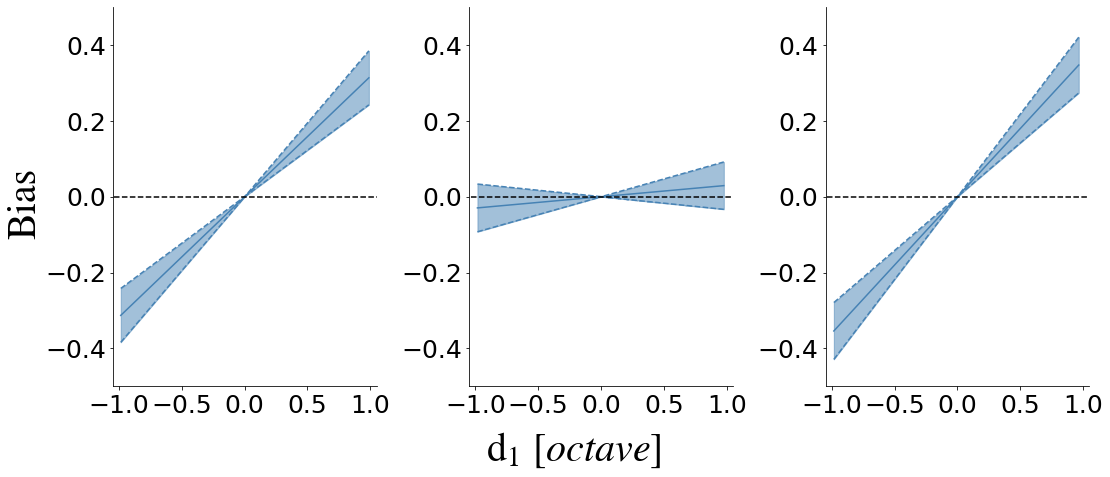

In [13]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0

    fs,es = -A_comp_pure[i],-E_comp_pure[i]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)
   
    # df_1['d1x2_r'] = df_1['d1']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
   
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,2],es[o,2],colors[1],alpha=.5)
    
    # df_1['d1_r2'] = df_1['d1']
    # # df_1['d1_r2'][df_1['flags_d1']==4] = 0
    # df_1['d1_r2'][df_1['dinf']<0] = 0
   
    # o = np.argsort(df_1['d1_r2'].values)
    # plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)


    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


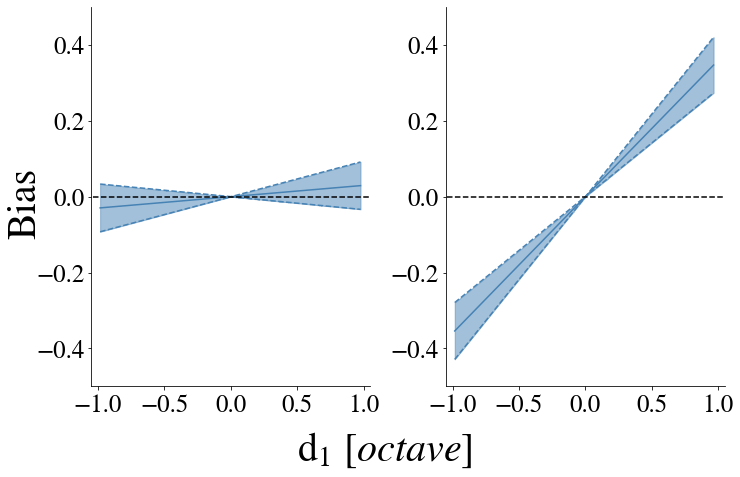

In [14]:
f ,axarr = plt.subplots(1,2,figsize=(10,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']

# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

for i,df in enumerate([df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0

    fs,es = -A_comp_pure[i+1],-E_comp_pure[i+1]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)
   
    # df_1['d1x2_r'] = df_1['d1']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
   
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,2],es[o,2],colors[1],alpha=.5)
    
    # df_1['d1_r2'] = df_1['d1']
    # # df_1['d1_r2'][df_1['flags_d1']==4] = 0
    # df_1['d1_r2'][df_1['dinf']<0] = 0
   
    # o = np.argsort(df_1['d1_r2'].values)
    # plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)
    
    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
len(o)

In [15]:
# ===== Human participants =====
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1x2_var.append([])

    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
    
    fs = -A_comp_pure[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,5][I]
        d1_var[-1].append(vals.var())
        d1_area[-1].append(np.abs(vals).mean())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

#         vals = fs[o,1][~I]+fs[o,6][~I]
#         d1x2_var[-1].append(vals.var())
#         d1x2_area[-1].append(np.abs(vals).mean())
#         d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

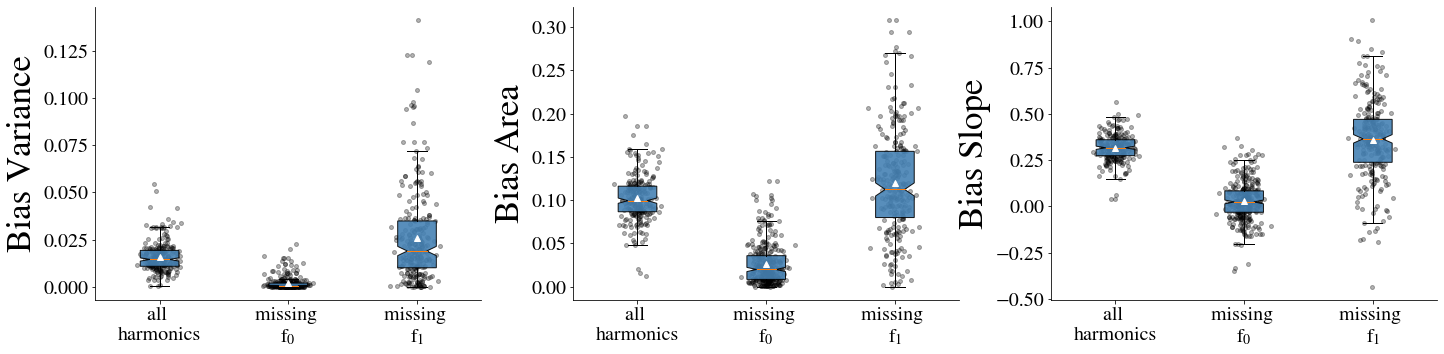

In [16]:
# color = ['b','r','g']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_area, d1_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Area', 'Bias Slope']    

f, axarr = plt.subplots(1,3,figsize = [20,5])
for i in range(3):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


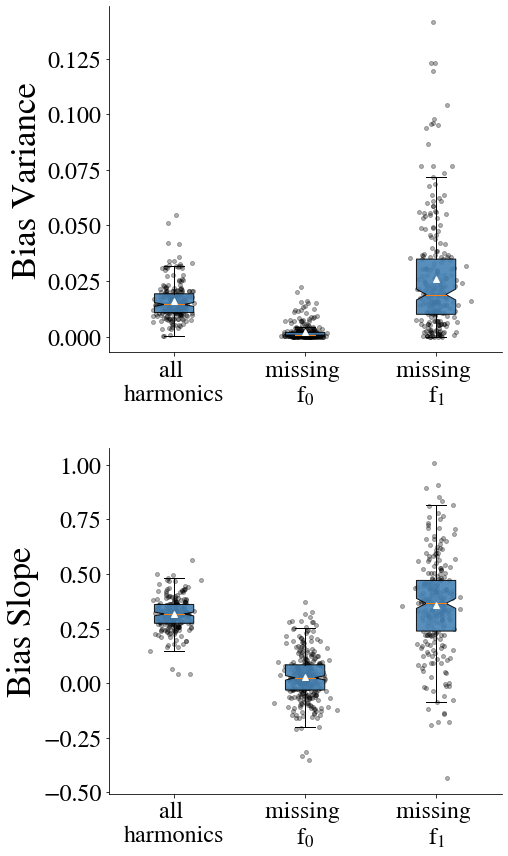

In [17]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Slope']    

f, axarr = plt.subplots(2,1,figsize = [7,12])
for i in range(2):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors, 
            alpha_face = 0.9)

    simpleaxis(ax,24)
    
plt.tight_layout(h_pad=4)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')


plt.show()

In [18]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_var, d1_slope], ['Variance', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

Variance
============KRUSKAL===============
KruskalResult(statistic=455.74922030540165, pvalue=1.0847115007507135e-99)
============DUNN===============
$chi2

[1] 455.7492



$Z

[1]  16.930296  -1.533922 -19.050598



$P

[1] 1.345112e-64 6.252448e-02 3.247771e-81



$P.adjusted

[1] 4.035337e-64 1.875734e-01 9.743312e-81



$comparisons

[1] "1 - 2" "1 - 3" "2 - 3"



Slope
============KRUSKAL===============
KruskalResult(statistic=455.7980158404753, pvalue=1.058567189975446e-99)
============DUNN===============
$chi2

[1] 455.798



$Z

[1]  17.006708  -1.409876 -18.995142



$P

[1] 3.661967e-65 7.928813e-02 9.353975e-81



$P.adjusted

[1] 1.098590e-64 2.378644e-01 2.806192e-80



$comparisons

[1] "1 - 2" "1 - 3" "2 - 3"





In [19]:
# ===== Human participants =====
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(2):
    d1_var.append([])
    d1x2_var.append([])
    
    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
    
    fs = -A_comp_pure[i+1]
    df = dfs[i+1]
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,5][I]
        d1_var[-1].append(vals.var())
        d1_area[-1].append(np.abs(vals).mean())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

#         vals = fs[o,1][~I]+fs[o,6][~I]
#         d1x2_var[-1].append(vals.var())
#         d1x2_area[-1].append(np.abs(vals).mean())
#         d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


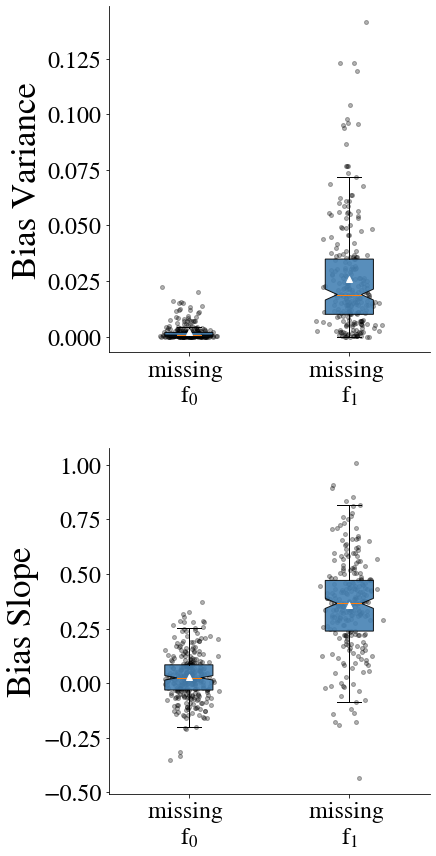

In [20]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Slope']    

f, axarr = plt.subplots(2,1,figsize = [6,12])
for i in range(2):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors, 
            alpha_face = 0.9)

    simpleaxis(ax,24)
    
plt.tight_layout(h_pad=4)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

### pure -> complex, observing contraction of f0 by pure in 1000-2000Hz (d1_r2)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


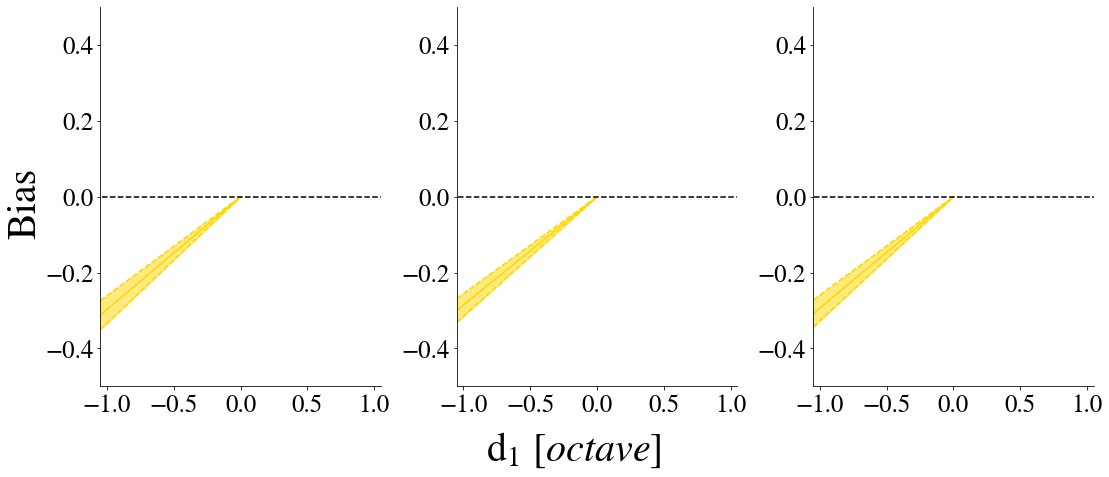

In [21]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
# colors = ['steelblue', 'steelblue', 'steelblue']
colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r2'] = df_1['d1']
    df_1['d1_r2'][df_1['flags_d1']==4] = 0

    fs,es = -A_comp_pure[i],-E_comp_pure[i]

    o = np.argsort(df_1['d1_r2'].values)
    plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,1],es[o,1],colors[i],alpha=.5)
   
    # df_1['d1x2_r'] = df_1['d1']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
   
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,2],es[o,2],colors[1],alpha=.5)
    
    # df_1['d1_r2'] = df_1['d1']
    # # df_1['d1_r2'][df_1['flags_d1']==4] = 0
    # df_1['d1_r2'][df_1['dinf']<0] = 0
   
    # o = np.argsort(df_1['d1_r2'].values)
    # plot_with_errors(ax,df_1['d1_r2'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)


    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [22]:
# ===== Human participants =====
inter = []
d1_var = []
d1_r2_var = []

d1_area = []
d1_r2_area = []

d1_slope = []
d1_r2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1_r2_var.append([])

    d1_area.append([])
    d1_r2_area.append([])
    
    d1_slope.append([])
    d1_r2_slope.append([])
    
    inter.append([])
    
    fs = -A_comp_pure[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r2'] = df_1['d1']
    df_1['d1_r2'][df_1['flags_d1']==4] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,1][I]+fs[o,6][I]
        d1_r2_var[-1].append(vals.var())
        d1_r2_area[-1].append(np.abs(vals).mean())
        d1_r2_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

#         vals = fs[o,1][~I]+fs[o,6][~I]
#         d1x2_var[-1].append(vals.var())
#         d1x2_area[-1].append(np.abs(vals).mean())
#         d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

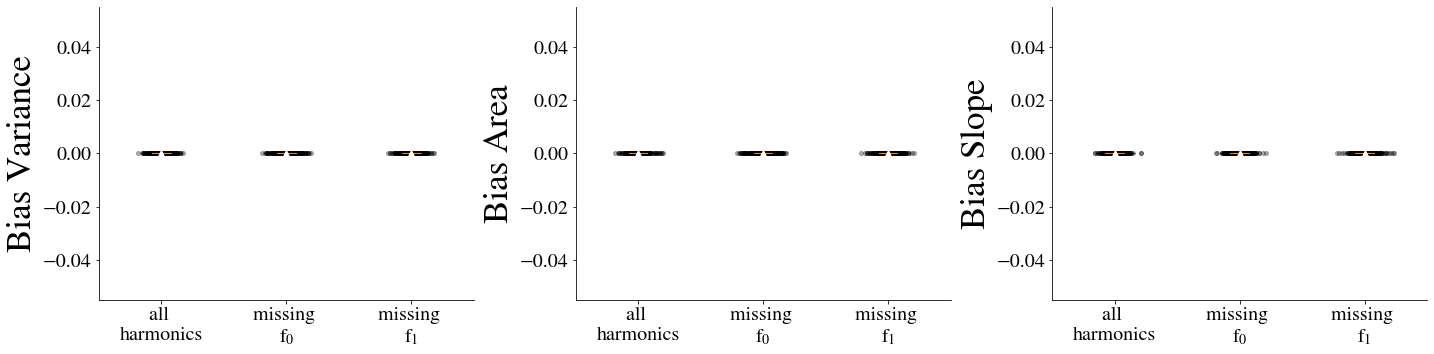

In [23]:
# color = ['b','r','g']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
# colors = ['steelblue', 'steelblue', 'steelblue']
colors = ['gold', 'gold', 'gold']

data = [d1_r2_var, d1_r2_area, d1_r2_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Area', 'Bias Slope']    

f, axarr = plt.subplots(1,3,figsize = [20,5])
for i in range(3):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

### pure -> complex, pure is only 1000-2000

In [25]:
mgcv = importr('mgcv')
base = importr('base')
psyphy= importr('psyphy')
stats = importr('stats')
link = psyphy.probit_2asym(.05,.05)
fam = stats.binomial(link)

In [ ]:
fss = []
fes = []

# model = 'y~ s(alphas,by=df,k=5) + s(d1,k=4) + s(dinf,k=7)'

model = 'y ~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) \
           + s(subject,bs="re") + s(d1_r,subject,bs="re")'

# model = 'y ~ s(alphas,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7) \
#            + s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")'

# model = 'y ~ s(acc,by=df,k=5) + d1_r + d1_r2 + s(dinf,k=7) \
#            + s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1_r2,subject,bs="re")'

# model = 'y ~ s(alphas,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7)'

# model = 'y~ s(alphas,by=df,k=5) + d1_r + d1_r2 + s(dinf,k=7)'

        #   + s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")

for j in range(3):
        print(j)
        df = dfs[j]
        
        # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
        df_1 = df[(df['flags_d1'].values==4)].copy()
        df_1 = df_1.set_index(np.arange(len(df_1)))
        
        df_1['d1_r'] = df_1['d1']
        # df_1['d1_r'][df_1['flags_d1']==5] = 0
        
        # df_1['d1_r2'] = df_1['d1']
        # df_1['d1_r2'][df_1['dinf']<0] = 0
        
        # df_1['d1_r2'] = df_1['d1']
        # df_1['d1_r2'][df_1['flags_d1']==4] = 0

        # df_1['d1x2_r'] = df_1['d1x2']
        # df_1['d1x2_r'][df_1['dinf']<0] = 0
        
        # df_1['d1x2_r'] = df_1['d1x2']
        # df_1['d1x2_r'][df_1['flags_d1']==4] = 0

        print(len(df_1))

# fs,es = mgcv_fit(df_1,model, columns, factors=['flags_d1','flag','subject'])

        try:
                fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
        except:
                fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
        
        fss.append(fs)
        fes.append(es)

0
8436
1
11702
2
9439


In [41]:
import pickle
pickle.dump([df_1, fss, fes], open("gam_Pure_Complex.p", "wb"))

In [8]:
df_1,fss,fes = pickle.load(open("gam_Pure_Complex.p", "rb"))
print(df_1,fss,fes) ## To verify 

            df        d1      d1x2      d1x3      d1x4       d12  d1_g1  \
0     0.015267  0.011987  1.011987 -1.572976 -1.988013 -0.028703    0.0   
1     0.012216 -0.396517  0.603483 -1.981480 -2.396517 -0.416876    0.0   
2     0.082800  0.432047  1.432047 -1.152916 -1.567953  0.502162    0.0   
3    -0.038068 -0.042571  0.957429 -1.627534 -2.042571 -0.136137    0.0   
4     0.059044 -0.062656  0.937344 -1.647618 -2.062656 -0.089456    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
9434 -0.127663  0.482417  1.482417 -1.102545 -1.517583  0.619687    0.0   
9435 -0.057378  0.149799  1.149799 -1.435164 -1.850201  0.111759    0.0   
9436 -0.087830  0.286734  1.286734 -1.298228 -1.713266  0.386910    0.0   
9437  0.034287 -0.155651  0.844349 -1.740613 -2.155651 -0.027136    0.0   
9438  0.057089 -0.212699  0.787301 -1.797662 -2.212699 -0.112005    0.0   

         d1_g2        d2       d22        d3        d4        d5      dinf  \
0     0.011987 -1.057

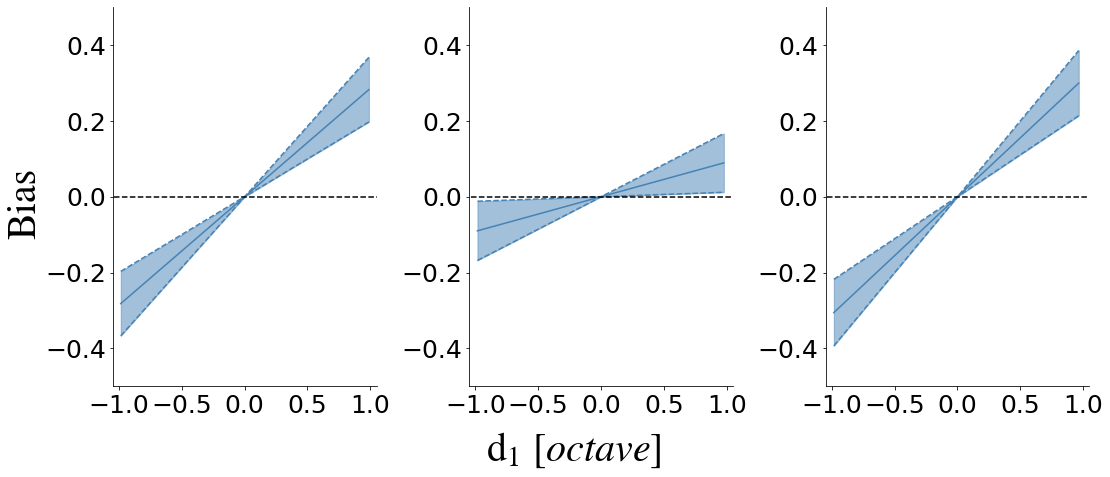

In [9]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    # df_1['d1_r'][df_1['flags_d1']==5] = 0

    # df_1['d1x2_r'] = df_1['d1x2']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    fs,es = fss[i],fes[i]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)
    
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)

    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [10]:
# ===== Human participants =====
inter = []
d1_var = []
d1_slope = []
d1_area = []

for i in range(3):
    d1_var.append([])
    d1_slope.append([])
    d1_area.append([])
    inter.append([])
    
    fs = fss[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    # df_1['d1_r'][df_1['flags_d1']==5] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,4][I]
        d1_var[-1].append(vals.var())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])
        d1_area[-1].append(np.abs(vals).mean())

        # vals = fs[o,1][~I]+fs[o,6][~I]
        # d1x2_var[-1].append(vals.var())
        # d1x2_area[-1].append(np.abs(vals).mean())
        # d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


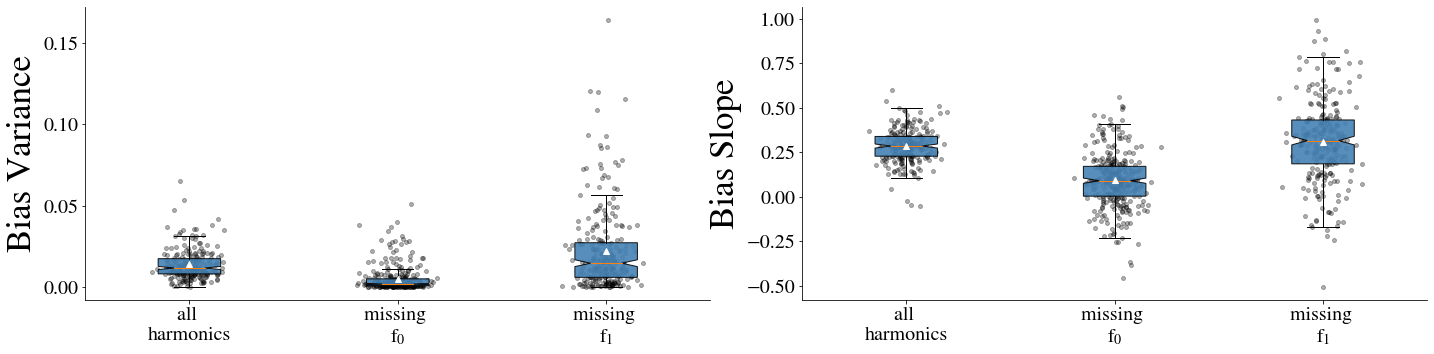

In [11]:
# color = ['b','r','g']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Slope']    

f, axarr = plt.subplots(1,2,figsize = [20,5])
for i in range(2):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


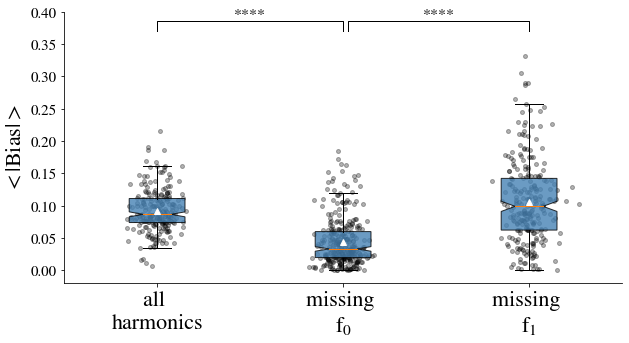

In [13]:
# mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'STIXGeneral'

colors = ['steelblue','steelblue','steelblue']

data = d1_area

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = '$\mathrm{<|Bias|>}$'  

f, axarr = plt.subplots(figsize = (10,5))
ax = axarr

simpleaxis(ax,16)

box_plot(ax, data, 
         xlabel = ['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'],
         ylabel = labels, 
         colors = colors, 
         alpha_face = 0.8)

ax.set_xticklabels(['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'], fontsize=22)
ax.set_ylabel(labels, fontsize = 22)


# statistical annotation
x1, x2, x3 = 0, 1, 2 # columns 'all harmonics', 'missing f0', 'missing f1' 
y, h, col = 0.37, 0.015, 'k'
delta = 0.025

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

x2 = x2+delta
plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x2+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

# y = y+delta*1.5
# plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
# plt.text((x1+x3)*.5, y+h, "n.s.", ha='center', va='bottom', color=col, fontsize=16)


plt.ylim(-0.02, 0.4)

# plt.tight_layout(h_pad=4)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


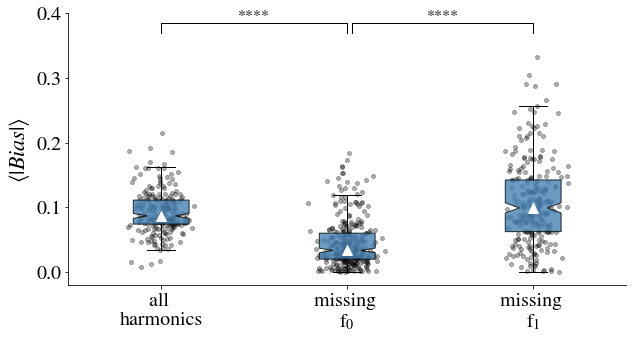

In [15]:
def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    noise = []
    ys = []
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i])
        noise.append(np.random.randn(len(ys[i]))*.07)
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i]+noise[i],data[i],'o',ms=4,color='k',alpha=.3)
        try:
            ax.plot(ys, data,  '-', color = 'k',alpha=.05)
            ax.plot(ys, np.mean(data,1), '-k',lw=2)
        except:
            pass
    
    bplot1 = ax.boxplot(data , notch = 'True', positions=y, vert=1, patch_artist=True, showmeans=False,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)
        
    for median in bplot1['medians']:
        median.set_color('firebrick')
        median.set(linewidth=0)


colors = ['steelblue', 'steelblue', 'steelblue']

data = d1_area

labels = r'$\langle|Bias|\rangle$'   

f, axarr = plt.subplots(figsize = (10,5))
ax = axarr


box_plot(ax, data, 
         xlabel = ['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'],
         ylabel = labels, 
         colors = colors, 
         alpha_face = 0.8)

ax.set_xticklabels(['all \nharmonics','missing \n$\mathrm{f_0}$','missing \n$\mathrm{f_1}$'], fontsize=22)
ax.set_ylabel(labels, fontsize = 22)

simpleaxis(ax,20)


# plot the medians with triangle markers inside the boxplot
y_median = []
x_median = [0, 1, 2]
for x in x_median:
    y_median.append(np.median(d1_area[x]))

plt.plot(x_median, y_median, marker = '^', markerfacecolor='white', markersize = 10, 
    markeredgecolor = 'white', color='white', linestyle='')


# statistical annotation
x1, x2, x3 = 0, 1, 2 # columns 'all harmonics', 'missing f0', 'missing f1' 
y, h, col = 0.37, 0.015, 'k'
delta = 0.025

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

x2 = x2+delta
plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x2+x3)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize=16)

# y = y+delta*1.5
# plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1, c=col)
# plt.text((x1+x3)*.5, y+h, "n.s.", ha='center', va='bottom', color=col, fontsize=16)

plt.ylim(-0.02, 0.4)

#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\user\miniconda3\envs\py39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


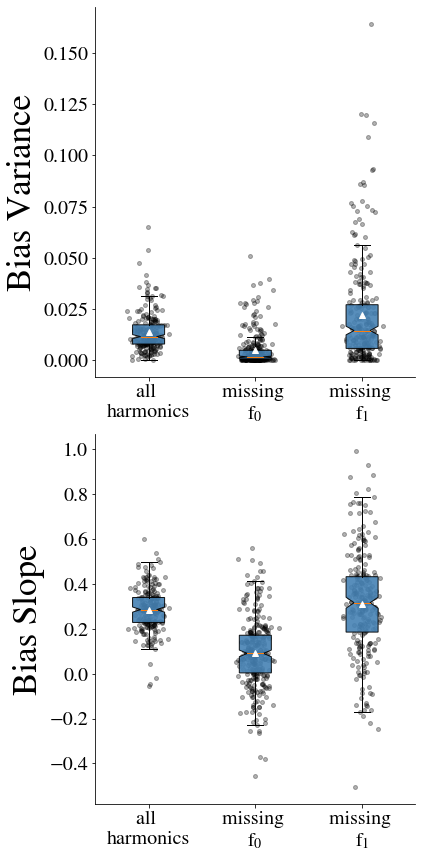

In [30]:
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_slope]

labels = ['Bias Variance', 'Bias Slope']    

f, axarr = plt.subplots(2,1,figsize = [6,12])
for i in range(2):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

In [ ]:
for j in range(3):
    print(j)
    df = dfs[j]

    # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))

    df_1['d1_r'] = df_1['d1']
    print(len(df_1))

    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))

    b1 = mgcv.gam(ro.r(model),\
                data=datar,\
                family=fam,\
                optimizer='perf')

    print(mgcv.summary_gam(b1))

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_var, d1_slope], ['Variance', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [38]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_area], ['$\mathrm{<|Bias|>}$']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

$\mathrm{<|Bias|>}$
============KRUSKAL===============
KruskalResult(statistic=246.81518566018167, pvalue=2.5395888340978704e-54)
============DUNN===============
$chi2

[1] 246.8152



$Z

[1]  12.886126  -0.406874 -13.678511



$P

[1] 2.694149e-38 3.420503e-01 6.822939e-43



$P.adjusted

[1] 8.082446e-38 1.000000e+00 2.046882e-42



$comparisons

[1] "1 - 2" "1 - 3" "2 - 3"





In [37]:
methods = ['variance','slope']
for i in range(3):
    print('==============================')
    print('Exp:{}'.format(i))
    for m,data in enumerate([[d1_var], [d1_slope]]):
        print('method: {}'.format(methods[m]))
        print('{}/{}'.format((np.array(data[0][i])>0).sum(), len(data[0][i])))
        # print('{}/{}'.format((np.array(data[1][i])>0).sum(), len(data[1][i])))

Exp:0
method: variance
230/230
method: slope
227/230
Exp:1
method: variance
316/316
method: slope
239/316
Exp:2
method: variance
253/253
method: slope
232/253


In [ ]:
# testing the significant of slopes (larger than 0)
for i in range(3):
    print('==============================')
    for data in [[d1_slope]]:
        print(wilcoxon(data[0][i]))
        # print(wilcoxon(data[1][i]))

In [ ]:
models = ['y~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) + \
              s(subject,bs="re") + s(d1_r,subject,bs="re")',

          'y~ s(alphas,by=df,k=5) + s(dinf,k=7) + s(subject,bs="re")']


for j in range(3):
    
    print(j)
    df = dfs[j]
    
    # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    
    print(len(df_1))

    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))
    b = mgcv.gam(ro.r(models[0]),\
                 data=datar,\
                 family=fam,\
                 optimizer='perf')

    b2 = mgcv.gam(ro.r(models[1]),\
                  data=datar,\
                  family=fam,\
                  optimizer='perf')
    
    print(mgcv.anova_gam(b,b2,test='Chisq'))

In [ ]:
model = 'y ~ s(acc,by=df,k=5) + d1_r + s(dinf,k=7) \
           + s(subject,bs="re") + s(d1_r,subject,bs="re")'
j = 0
print(j)
df = dfs[j]

# df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
df_1 = df[(df['flags_d1'].values==4)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
# df_1['d1_r'][df_1['flags_d1']==5] = 0

# df_1['d1_r2'] = df_1['d1']
# df_1['d1_r2'][df_1['flags_d1']==4] = 0

print(len(df_1))

datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print('=================  exp {} ============================'.format(str(j)))

b1 = mgcv.gam(ro.r(model),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.summary_gam(b1))

In [ ]:
fs.shape
fs[:,1]

In [ ]:
f, axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
# colors = ['steelblue', 'steelblue', 'steelblue']
colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    # df_1['d1_r'] = df_1['d1']
    # df_1['d1_r'][df_1['flags_d1']==5] = 0

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    fs,es = fss[i],fes[i]

    o = np.argsort(df_1['d1x2_r'].values)
    plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=.5)
   
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,2],es[o,2],colors[1],alpha=.5)
    
    # df_1['d1x2_r'] = df_1['d1x2']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
   
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)


    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0

    # df_1['d1x2_r'] = df_1['d1x2']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    fs,es = fss[i],fes[i]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)
    
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)

    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
f ,axarr = plt.subplots(1,3,figsize=(15,6),sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=.5
# colors = ['b' ,'g', 'r', 'y']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']
# colors = ['gold', 'gold', 'gold']


# Chaning font to stix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


for i,df in enumerate([df1,df2,df3]):
    ax = axarr[i]

    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0

    # df_1['d1x2_r'] = df_1['d1x2']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    fs,es = fss[i],fes[i]

    o = np.argsort(df_1['d1_r'].values)
    plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,0],es[o,0],colors[i],alpha=.5)
    
    # o = np.argsort(df_1['d1x2_r'].values)
    # plot_with_errors(ax,df_1['d1x2_r'].values[o],fs[o,1],es[o,1],colors[1],alpha=.5)

    simpleaxis(ax, 25)
    draw_horizonal(ax,-1.1,1.1,0)
    
for ax in axarr:
    ax.set_xlim([-1.05,1.05])
    plt.xticks(np.arange(-1,1.1,0.5))
    ax.set_ylim([-.5,.5])
        
titles = ['All 3 harmonics','Missing fundamental','Missing f1']    

f.text(0.5, -0.075, '$\mathrm{d_{1}} \\ [octave]}$', fontsize=40, ha='center')
f.text(-0.025, 0.52, 'Bias', fontsize=40, va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
# ===== Human participants =====
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1x2_var.append([])

    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
    
    fs = fss[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['flags_d1']==5] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        vals = fs[o,0][I]+fs[o,5][I]
        d1_var[-1].append(vals.var())
        d1_area[-1].append(np.abs(vals).mean())
        d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

        # vals = fs[o,1][~I]+fs[o,6][~I]
        # d1x2_var[-1].append(vals.var())
        # d1x2_area[-1].append(np.abs(vals).mean())
        # d1x2_slope[-1].append(-(vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

In [ ]:
# color = ['b','r','g']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
colors = ['steelblue', 'steelblue', 'steelblue']

data = [d1_var, d1_area, d1_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Area', 'Bias Slope']    

f, axarr = plt.subplots(1,3,figsize = [20,5])
for i in range(3):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_var, d1_slope], ['Variance', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
# ===== Human participants =====
inter = []
d1_var = []
d1x2_var = []

d1_area = []
d1x2_area = []

d1_slope = []
d1x2_slope = []
# dinf_var = []
# dinf_difference_var = []


for i in range(3):
    d1_var.append([])
    d1x2_var.append([])

    d1_area.append([])
    d1x2_area.append([])
    
    d1_slope.append([])
    d1x2_slope.append([])
    
    inter.append([])
    
    fs = fss[i]
    df = dfs[i]
    df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))


    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    for p in range(int(df_1['subject'].max()+1)):
        o = df_1['subject'].values==p
        I = fs[o,0]!=0
        
        # vals = fs[o,0][I]+fs[o,5][I]
        # d1_var[-1].append(vals.var())
        # d1_area[-1].append(np.abs(vals).mean())
        # d1_slope[-1].append((vals/(df_1['d1'].values[o][I]))[0])

        vals = fs[o,1][~I]+fs[o,6][~I]
        d1x2_var[-1].append(vals.var())
        d1x2_area[-1].append(np.abs(vals).mean())
        d1x2_slope[-1].append((vals/(df_1['d1x2'].values[o][~I]))[0])


#         inter[-1].append(fs[o,3][0])
       
# slopes = []
# for i in range(5):
#     slopes.append([np.array(d1_var[i]),np.array(dinf_var[i])])

In [ ]:
# color = ['b','r','g']
# colors = ['dodgerblue', 'dodgerblue', 'dodgerblue']
# colors = ['steelblue', 'steelblue', 'steelblue']
colors = ['gold','gold','gold']

data = [d1x2_var, d1x2_area, d1x2_slope]

# exp_titles = ['all \nharmonics','missing \nF0','missing \nF1']
labels = ['Bias Variance', 'Bias Area', 'Bias Slope']    

f, axarr = plt.subplots(1,3,figsize = [20,5])
for i in range(3):
    ax = axarr[i]

    box_plot(ax, data[i], xlabel = ['all \nharmonics',\
                                    'missing \n$\mathrm{f_0}$',\
                                    'missing \n$\mathrm{f_1}$'] , 
            ylabel = labels[i], 
            colors = colors,
            alpha_face = 0.9)

    simpleaxis(ax,20)
    
plt.tight_layout(pad=1)
#saveas = '../images/figure4/figure4_'+str(5)+'.png'
#plt.savefig(saveas, format='png', dpi=800,bbox_inches='tight')

plt.show()

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1x2_var, d1x2_slope], ['Variance', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
models =  ['y~ s(alphas,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7) + \
               s(subject,bs="re") + s(d1_r,subject,bs="re") + s(d1x2_r,subject,bs="re")']

j = 0
print(j)
df = dfs[j]

df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['flags_d1']==5] = 0

df_1['d1x2_r'] = df_1['d1x2']
df_1['d1x2_r'][df_1['flags_d1']==4] = 0

print(len(df_1))

datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print('=================  exp {} ============================'.format(str(j)))

b1 = mgcv.gam(ro.r(models[0]),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.summary_gam(b1))

### statistical tests

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_var, d1_slope], ['Variance', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1x2_var, d1x2_area, d1x2_slope], ['Variance', 'Area', 'Slope']):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)

ANOVA

In [ ]:
models = ['y~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) + \
s(subject,bs="re") + s(d1_r,subject,bs="re")',

'y~ s(alphas,by=df,k=5) + s(dinf,k=7) + s(subject,bs="re")']


# models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(d1x2_r,k=7) + s(dinf,k=7)',
#           'y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(dinf,k=7)',
#           'y~ s(alphas,by=df,k=5) + s(d1x2_r,k=7) + s(dinf,k=7)']

for j in range(3):
    
    print(j)
    df = dfs[j]
    
    # df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
    df_1 = df[(df['flags_d1'].values==4)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    # df_1['d1_r'][df_1['flags_d1']==5] = 0
    
    # df_1['d1_r2'] = df_1['d1']
    # df_1['d1_r2'][df_1['flags_d1']==4] = 0
    
    # df_1['d1x2_r'] = df_1['d1x2']
    # df_1['d1x2_r'][df_1['flags_d1']==4] = 0
    
    
    print(len(df_1))

    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))
    b = mgcv.gam(ro.r(models[0]),\
                 data=datar,\
                 family=fam,\
                 optimizer='perf')

    b2 = mgcv.gam(ro.r(models[1]),\
                  data=datar,\
                  family=fam,\
                  optimizer='perf')
    
    print(mgcv.anova_gam(b,b2,test='Chisq'))
    
    print(mgcv.summary_gam(b))
    print(mgcv.summary_gam(b2))
    
    # print( '-------------- fit with s(d1) --------------------')

    # b = mgcv.gam(ro.r(models[0]),\
    #        data=datar,\
    #        family=fam,\
    #       optimizer='perf')

    # b2 = mgcv.gam(ro.r(models[2]),\
    #            data=datar,\
    #            family=fam,\
    #           optimizer='perf')
    
    # print(mgcv.anova_gam(b,b2,test='Chisq', nthreads=15))

In [ ]:
models = ['y~ s(acc,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7)',
          'y~ s(acc,by=df,k=5) + s(d1_r,k=4) + d1x2_r + s(dinf,k=7)',
          'y~ s(acc,by=df,k=5) + d1_r + s(d1x2_r,k=4) + s(dinf,k=7)',
          'y~ s(acc,by=df,k=5) + s(d1_r,k=4) + s(d1x2_r,k=4) + s(dinf,k=7)']


# models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(d1x2_r,k=7) + s(dinf,k=7)',
#         'y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(dinf,k=7)',
#          'y~ s(alphas,by=df,k=5) + s(d1x2_r,k=7) + s(dinf,k=7)']

for j in range(3):
    
    print(j)
    df = dfs[j]
    
    df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
    df_1 = df_1.set_index(np.arange(len(df_1)))
    
    df_1['d1_r'] = df_1['d1']
    df_1['d1_r'][df_1['dinf']>0] = 0

    df_1['d1x2_r'] = df_1['d1x2']
    df_1['d1x2_r'][df_1['dinf']<0] = 0
    
    print(len(df_1))
          
    datar = base.data_frame(df_1)
    datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

    print('=================  exp {} ============================'.format(str(j)))
    print( '-------------- fit with s(d1_r) --------------------')
    b = mgcv.gam(ro.r(models[0]),\
           data=datar,\
           family=fam,\
          optimizer='perf')

    b2 = mgcv.gam(ro.r(models[1]),\
               data=datar,\
               family=fam,\
              optimizer='perf')
    
    print(mgcv.anova_gam(b,b2,test='Chisq'))
    
    # print( '-------------- fit with s(d1) --------------------')

    # b = mgcv.gam(ro.r(models[0]),\
    #        data=datar,\
    #        family=fam,\
    #       optimizer='perf')

    # b2 = mgcv.gam(ro.r(models[2]),\
    #            data=datar,\
    #            family=fam,\
    #           optimizer='perf')
    
    # print(mgcv.anova_gam(b,b2,test='Chisq', nthreads=15))
    
    
    

In [ ]:
print(mgcv.summary_gam(b))
print(mgcv.summary_gam(b2))

In [ ]:
# models = ['y~ s(acc,by=df,k=5) + d1_r + d1x2_r + s(dinf,k=7)',
#           'y~ s(acc,by=df,k=5) + d1_r +          s(dinf,k=7)',
#           'y~ s(acc,by=df,k=5) +        d1x2_r + s(dinf,k=7)']

models =  ['y~ s(alphas,by=df,k=5) + d1_r + d1x2_r  + s(dinf,k=7) + \
               s(subject,bs="re") + s(d1_r,subject,bs="re")+ s(d1x2_r,subject,bs="re")',

           'y~ s(alphas,by=df,k=5) + d1_r + s(dinf,k=7) + \
               s(subject,bs="re") + s(d1_r,subject,bs="re")',

           'y~ s(alphas, by=df,k=5) + d1x2_r + s(dinf,k=7) + \
               s(subject,bs="re") + s(d1x2_r,subject,bs="re")']

# models = ['y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(d1x2_r,k=7) + s(dinf,k=7)',
#         'y~ s(alphas,by=df,k=5) + s(d1_r,k=7) + s(dinf,k=7)',
#          'y~ s(alphas,by=df,k=5) + s(d1x2_r,k=7) + s(dinf,k=7)']

j=0

print(j)
df = dfs[j]

df_1 = df[(df['flags_d1'].values==4) | (df['flags_d1'].values==5)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
# df_1['d1_r'][df_1['dinf']>0] = 0
df_1['d1_r'][df_1['flags_d1']==5] = 0

df_1['d1x2_r'] = df_1['d1x2']
# df_1['d1x2_r'][df_1['dinf']<0] = 0
df_1['d1x2_r'][df_1['flags_d1']==4] = 0

print(len(df_1))

datar = base.data_frame(df_1)
datar[columns.index('subject')] = base.as_factor(datar[columns.index('subject')]) # declaring y1 into a factor

print('=================  exp {} ============================'.format(str(j)))
print( '-------------- addition of d1x2 --------------------')
b = mgcv.gam(ro.r(models[0]),\
        data=datar,\
        family=fam,\
        optimizer='perf')

b2 = mgcv.gam(ro.r(models[1]),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.anova_gam(b,b2,test='Chisq'))
# print(mgcv.summary_gam(b))
# print(mgcv.summary_gam(b2))

print( '-------------- addition of d1 --------------------')

# b = mgcv.gam(ro.r(models[0]),\
#         data=datar,\
#         family=fam,\
#         optimizer='perf')

b3 = mgcv.gam(ro.r(models[2]),\
            data=datar,\
            family=fam,\
            optimizer='perf')

print(mgcv.anova_gam(b,b3,test='Chisq'))
# print(mgcv.summary_gam(b))
# print(mgcv.summary_gam(b2)) 